In [ ]:
import mlflow
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve




pd.set_option('display.max_columns', None)

/Users/mikosa/tensor/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data = pd.read_csv('data/hybrid_audience.csv')
data.head()

,User_ID,Age,Gender,Location,Device_Type,Ad_Platform,Viewing_Hours,Clicks,Purchase_Made,Income,Ad_Spent,Demographic_Group,Frequency,Engagement_Score
0,1,48.0,Male,Rural,Desktop,Streaming,4.207828,4,No,101069.466456,173.510714,D,5,12.813300
1,2,35.0,Male,Suburban,Desktop,Streaming,3.480265,2,Yes,72834.388787,133.855251,D,9,78.744859
2,3,39.0,Other,Suburban,Tablet,Digital,2.178991,1,No,31738.387343,236.298090,B,18,3.582487
3,4,35.0,Male,Suburban,Mobile,Social Media,8.412010,2,No,112039.137105,825.804793,B,5,80.571119
4,5,62.0,Other,Rural,Desktop,Digital,7.924670,6,No,122755.391331,524.238812,B,12,38.841344


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            10000 non-null  int64  
 1   Age                9781 non-null   float64
 2   Gender             10000 non-null  object 
 3   Location           10000 non-null  object 
 4   Device_Type        10000 non-null  object 
 5   Ad_Platform        10000 non-null  object 
 6   Viewing_Hours      9700 non-null   float64
 7   Clicks             10000 non-null  int64  
 8   Purchase_Made      10000 non-null  object 
 9   Income             9500 non-null   float64
 10  Ad_Spent           10000 non-null  float64
 11  Demographic_Group  10000 non-null  object 
 12  Frequency          10000 non-null  int64  
 13  Engagement_Score   9600 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.1+ MB


In [4]:
num_cols = [col for col in data.columns  if data[col].dtypes == 'float64']
cat_cols = [col for col in data.columns if data[col].dtypes == 'object' and col not in ['User_ID', 'Purchase_Made']]

In [5]:
data[num_cols].describe()

,Age,Viewing_Hours,Income,Ad_Spent,Engagement_Score
count,9781.000000,9700.000000,9500.000000,10000.000000,9600.000000
mean,41.599734,5.029015,85240.692603,550.063480,49.681939
std,13.779300,2.891281,37508.728756,259.102558,28.790180
min,18.000000,0.000933,20043.042483,100.206010,0.001577
25%,30.000000,2.525650,52540.291551,325.094102,24.797506
50%,41.000000,5.026289,85688.114772,551.482398,49.063309
75%,53.000000,7.558153,117427.965452,771.428236,74.376061
max,65.000000,9.998090,149988.557370,999.925258,99.991726


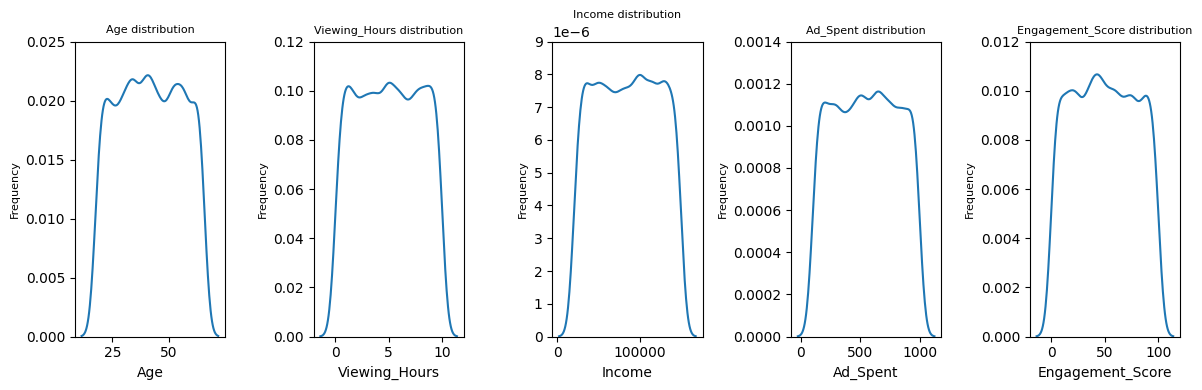

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize = (12, 4))
for id, col in enumerate(num_cols):
    sns.kdeplot(data = data , x = col, ax = ax[id])
    ax[id].set_yticks(ax[id].get_yticks())
    ax[id].tick_params(axis='y', labelsize=10)
    ax[id].set_title(f'{col} distribution', fontsize = 8) 
    ax[id].set_ylabel('Frequency', fontsize = 8)

plt.tight_layout()

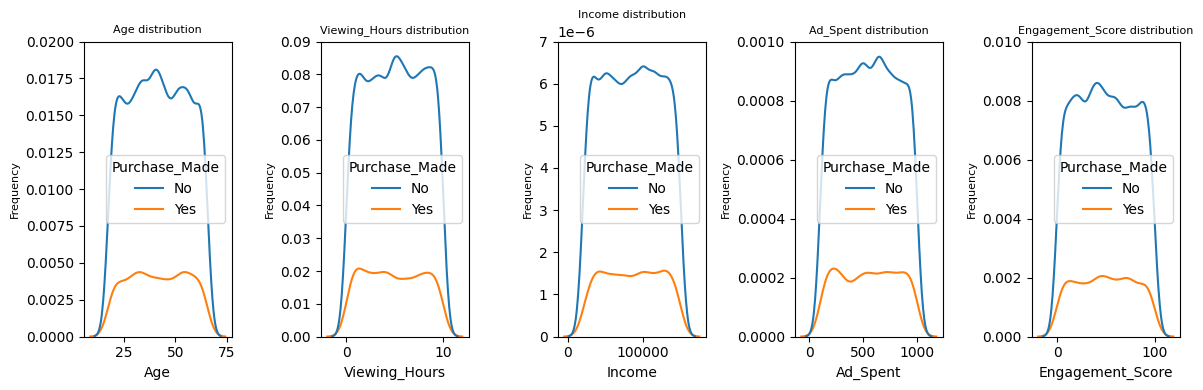

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize = (12, 4))
for id, col in enumerate(num_cols):
    sns.kdeplot(data = data , x = col, hue='Purchase_Made', ax = ax[id])
    ax[id].set_yticks(ax[id].get_yticks())
    ax[id].tick_params(axis='y', labelsize=10)
    ax[id].set_title(f'{col} distribution', fontsize = 8) 
    ax[id].set_ylabel('Frequency', fontsize = 8)

plt.tight_layout()


In [8]:
num_cols 

['Age', 'Viewing_Hours', 'Income', 'Ad_Spent', 'Engagement_Score']

In [9]:
num_unteated_cols = [col for col in data.columns if data[col].dtypes == 'float64' and col in [ 'Viewing_Hours','Clicks','Income']]

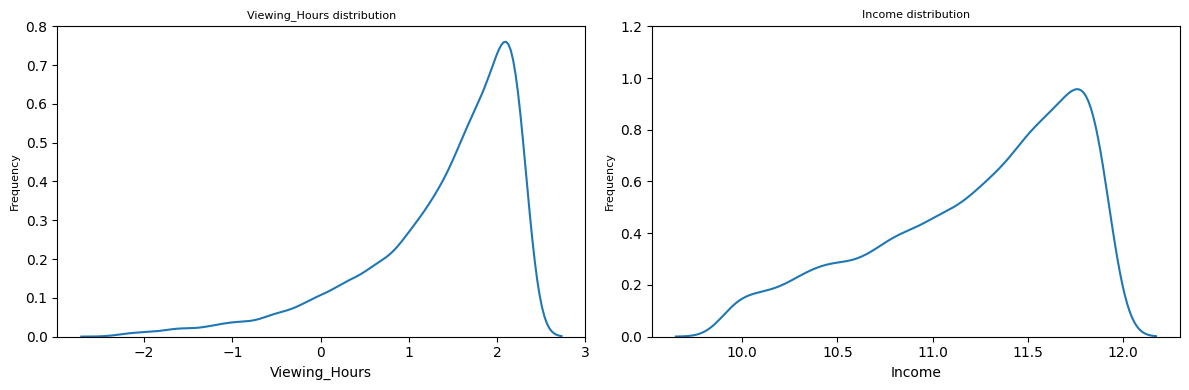

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_unteated_cols), figsize = (12, 4))
for id, col in enumerate(num_unteated_cols):
    sns.kdeplot(data = np.log(data[col]+0.1) , ax = ax[id])
    ax[id].set_yticks(ax[id].get_yticks())
    ax[id].tick_params(axis='y', labelsize=10)
    ax[id].set_title(f'{col} distribution', fontsize = 8) 
    ax[id].set_ylabel('Frequency', fontsize = 8)

plt.tight_layout()

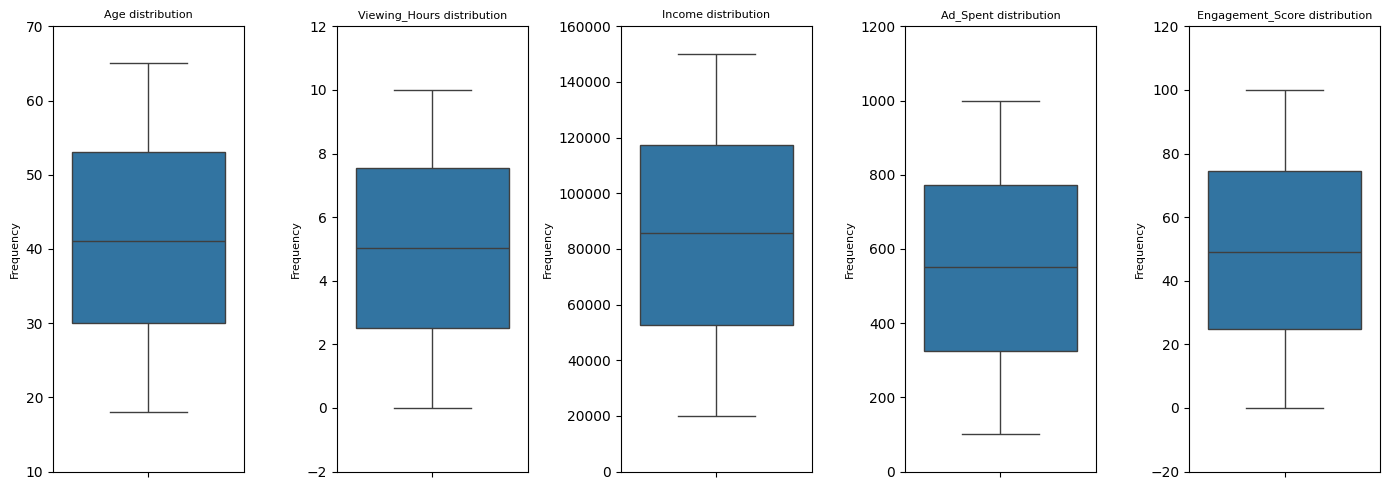

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize = (14, 5))
for id, col in enumerate(num_cols):
    sns.boxplot(data = data , y = col, ax = ax[id])
    ax[id].set_yticks(ax[id].get_yticks())
    ax[id].tick_params(axis='y', labelsize=10)
    ax[id].set_title(f'{col} distribution', fontsize = 8) 
    ax[id].set_ylabel('Frequency', fontsize = 8)

plt.tight_layout()

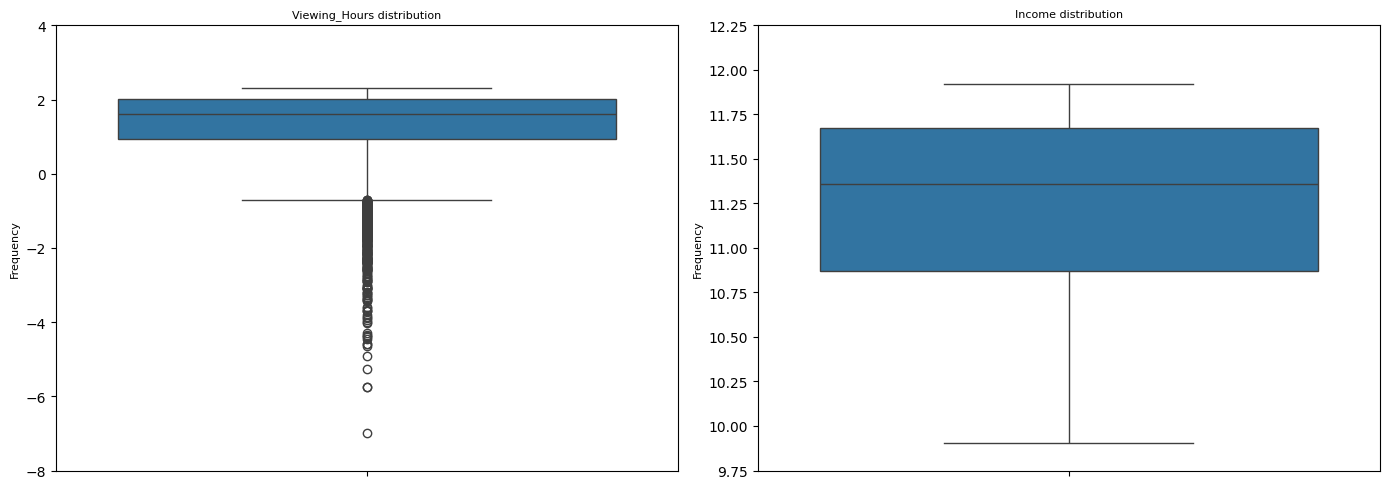

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_unteated_cols), figsize = (14, 5))
for id, col in enumerate(num_unteated_cols):
    sns.boxplot(data = np.log(data[col]) , ax = ax[id])
    ax[id].set_yticks(ax[id].get_yticks())
    ax[id].tick_params(axis='y', labelsize=10)
    ax[id].set_title(f'{col} distribution', fontsize = 8) 
    ax[id].set_ylabel('Frequency', fontsize = 8)

plt.tight_layout()

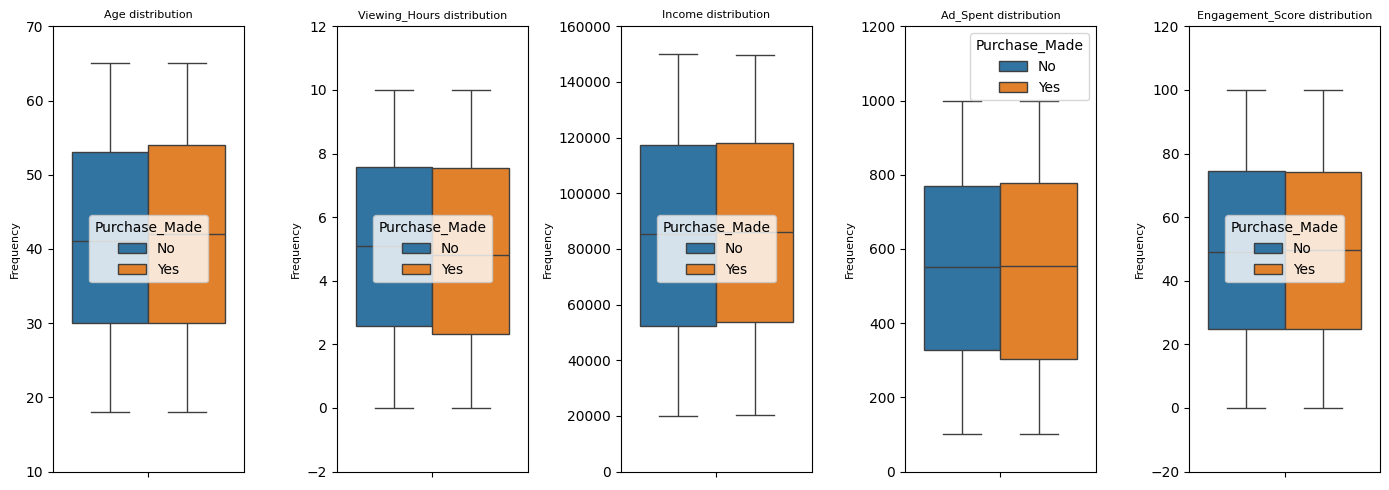

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize = (14, 5))
for id, col in enumerate(num_cols):
    sns.boxplot(data = data , y = col, hue='Purchase_Made', ax = ax[id])
    ax[id].set_yticks(ax[id].get_yticks())
    ax[id].tick_params(axis='y', labelsize=10)
    ax[id].set_title(f'{col} distribution', fontsize = 8) 
    ax[id].set_ylabel('Frequency', fontsize = 8)

plt.tight_layout()

In [14]:
data[cat_cols].describe()

,Gender,Location,Device_Type,Ad_Platform,Demographic_Group
count,10000,10000,10000,10000,10000
unique,3,3,3,4,4
top,Female,Urban,Desktop,Streaming,B
freq,3340,3408,3447,2516,2560


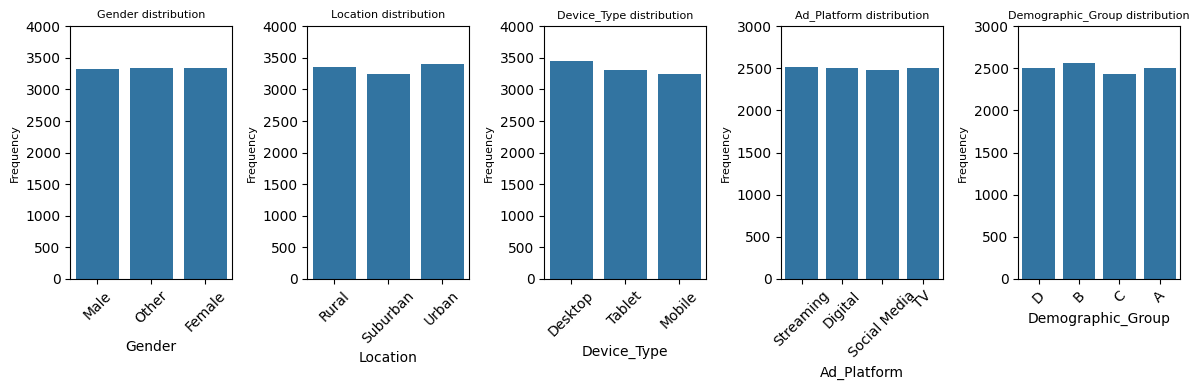

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=len(cat_cols), figsize = (12, 4))
for id, col in enumerate(cat_cols):
    sns.countplot(data = data , x = col, ax = ax[id])
    ax[id].set_yticks(ax[id].get_yticks())
    ax[id].tick_params(axis='x', rotation=45)
    ax[id].tick_params(axis='y', labelsize=10)
    ax[id].set_title(f'{col} distribution', fontsize = 8) 
    ax[id].set_ylabel('Frequency', fontsize = 8)

plt.tight_layout()

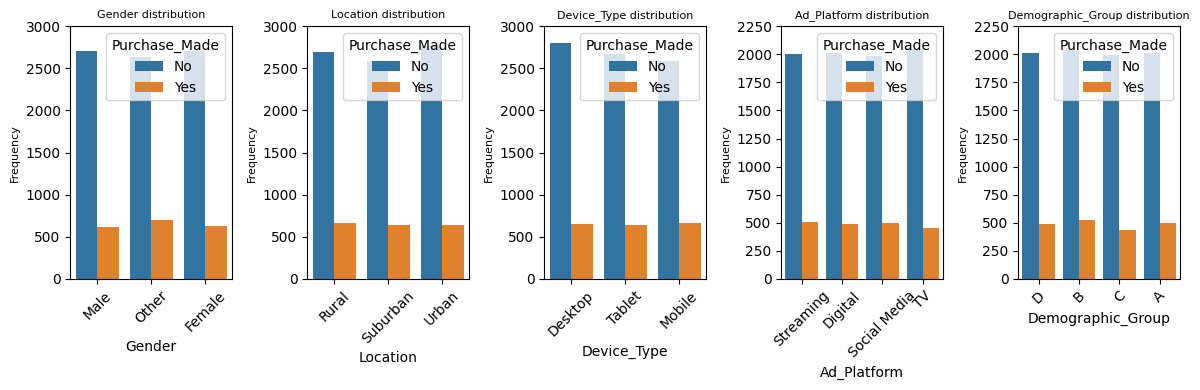

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=len(cat_cols), figsize = (12, 4))
for id, col in enumerate(cat_cols):
    sns.countplot(data = data , x = col, hue='Purchase_Made', ax = ax[id])
    ax[id].set_yticks(ax[id].get_yticks())
    ax[id].tick_params(axis='x', rotation=45)
    ax[id].tick_params(axis='y', labelsize=10)
    ax[id].set_title(f'{col} distribution', fontsize = 8) 
    ax[id].set_ylabel('Frequency', fontsize = 8)

plt.tight_layout()

<Axes: xlabel='Purchase_Made', ylabel='count'>

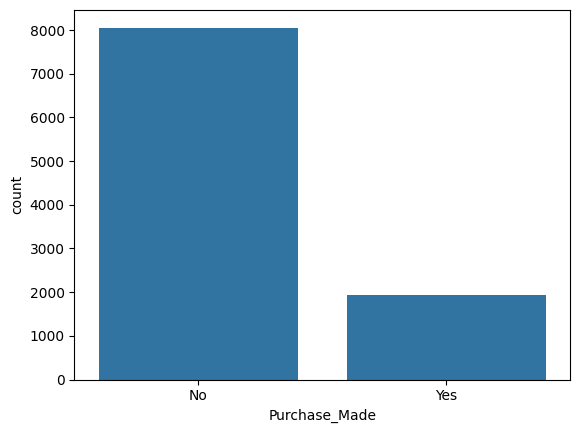

In [17]:
sns.countplot(x = 'Purchase_Made', data= data)

In [18]:
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

In [19]:
data.shape

(10000, 14)

In [20]:
pingouin.ttest(data['Clicks'], data['Engagement_Score'],  paired=True, alternative='two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-168.781516,9999,two-sided,0.0,"[-48.2, -47.1]",2.385802,inf,1.0


In [21]:
from scipy.stats import kruskal

kruskal(data['Clicks'], data['Viewing_Hours'],  data['Income'])

KruskalResult(statistic=22544.18025752518, pvalue=0.0)

In [22]:
from scipy.stats import ranksums

ranksums(data['Clicks'].values, data['Income'].values)

RanksumsResult(statistic=-122.47142539179546, pvalue=0.0)

In [23]:
from scipy.stats import mannwhitneyu

mannwhitneyu(data['Clicks'], data['Income'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [24]:
encoding = {}
for col in cat_cols:
    val_counts = data[col].value_counts(normalize=True, ascending=False).items()
    encoding[col] = {gender: idx for idx, (gender, _) in enumerate(val_counts, 1)}
    data[col] = data[col].map(encoding[col])


In [25]:
data.head()

,User_ID,Age,Gender,Location,Device_Type,Ad_Platform,Viewing_Hours,Clicks,Purchase_Made,Income,Ad_Spent,Demographic_Group,Frequency,Engagement_Score
0,1,48.0,3,2,1,1,4.207828,4,No,101069.466456,173.510714,3,5,12.813300
1,2,35.0,3,3,1,1,3.480265,2,Yes,72834.388787,133.855251,3,9,78.744859
2,3,39.0,2,3,2,3,2.178991,1,No,31738.387343,236.298090,1,18,3.582487
3,4,35.0,3,3,3,4,8.412010,2,No,112039.137105,825.804793,1,5,80.571119
4,5,62.0,2,2,1,3,7.924670,6,No,122755.391331,524.238812,1,12,38.841344


In [26]:
for col in num_unteated_cols:
    Q3 = data[col].quantile(0.75)
    Q1 = data[col].quantile(0.25) 
    IQR = Q3 - Q1

    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    # data[col] = np.clip(data[col], upper, lower)
    data = data[(data[col]<upper)& (data[col]>lower)]


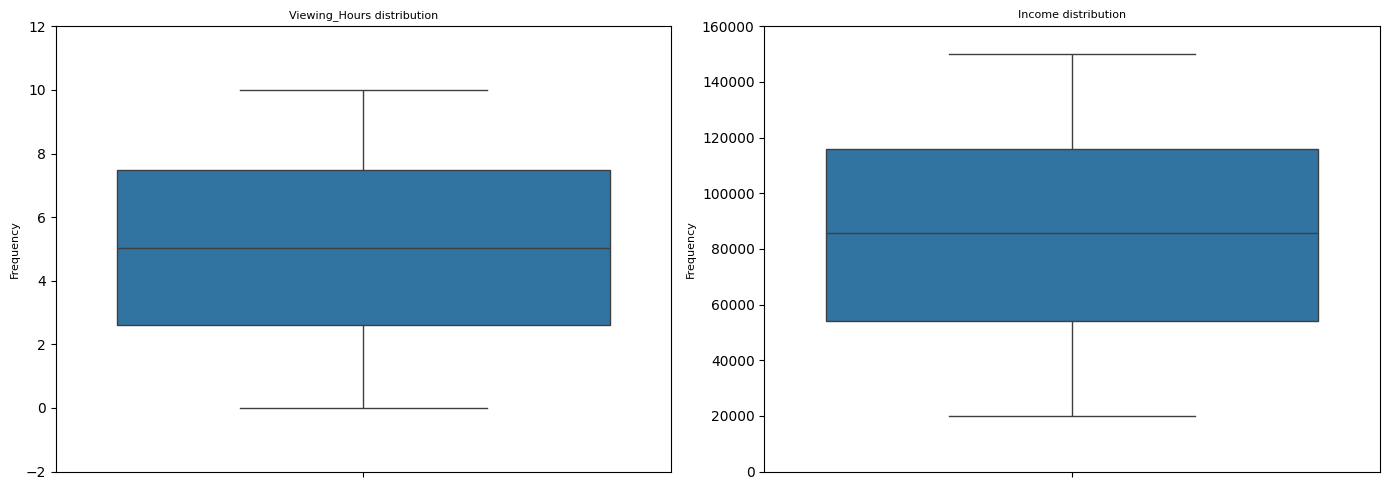

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_unteated_cols), figsize = (14, 5))
for id, col in enumerate(num_unteated_cols):
    sns.boxplot(data = data[col] , ax = ax[id])
    ax[id].set_yticks(ax[id].get_yticks())
    ax[id].tick_params(axis='y', labelsize=10)
    ax[id].set_title(f'{col} distribution', fontsize = 8) 
    ax[id].set_ylabel('Frequency', fontsize = 8)

plt.tight_layout()

In [28]:
stand = StandardScaler()
data[num_cols] = stand.fit_transform(data[num_cols])

In [29]:
data['Purchase_Made'] = data['Purchase_Made'].map({'No':0, 'Yes':1})

In [30]:
data.head()

,User_ID,Age,Gender,Location,Device_Type,Ad_Platform,Viewing_Hours,Clicks,Purchase_Made,Income,Ad_Spent,Demographic_Group,Frequency,Engagement_Score
0,1,0.470633,3,2,1,1,-0.288366,4,0,0.432375,-1.453369,3,5,-1.306183
1,2,-0.483343,3,3,1,1,-0.543882,2,1,-0.339979,-1.606426,3,9,1.031211
2,3,-0.189812,2,3,2,3,-1.000880,1,0,-1.464135,-1.211030,1,18,-1.633433
3,4,-0.483343,3,3,3,4,1.188114,2,0,0.732443,1.064270,1,5,1.095955
4,5,1.497993,2,2,1,3,1.016963,6,0,1.025580,-0.099675,1,12,-0.383442


In [47]:
count_0, count_1 = data['Purchase_Made'].value_counts()

data_0 = data[data['Purchase_Made']==0]
data_1 = data[data['Purchase_Made']==1]

In [48]:
data_oversap = data_1.sample(count_0, replace=True)

train = pd.concat([data_0, data_oversap])

<Axes: xlabel='Purchase_Made', ylabel='count'>

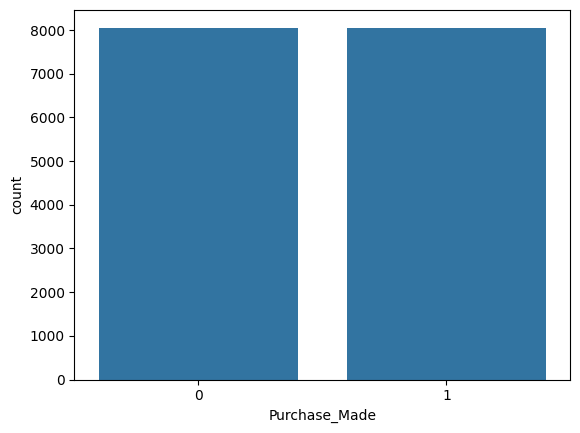

In [49]:
sns.countplot(x = 'Purchase_Made', data= train)

In [50]:
feat_col = train.drop(labels =['User_ID', 'Purchase_Made'], axis = 1)

target = train['Purchase_Made']

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(feat_col, target, test_size=0.25, random_state=45)

In [72]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print(f"Training Score for Logistic Regression: {logreg.score(X_train, Y_train)}")
print('\n')
print(f"Test Score for Logistic Regression: {logreg.score(X_test, Y_test)}")
print('\n')
print('Classification Report')
print(classification_report(Y_test, logreg.predict(X_test)))

Training Score for Logistic Regression: 0.5208574739281576


Test Score for Logistic Regression: 0.5228401191658392


Classification Report
              precision    recall  f1-score   support

           0       0.52      0.53      0.53      2008
           1       0.52      0.51      0.52      2020

    accuracy                           0.52      4028
   macro avg       0.52      0.52      0.52      4028
weighted avg       0.52      0.52      0.52      4028



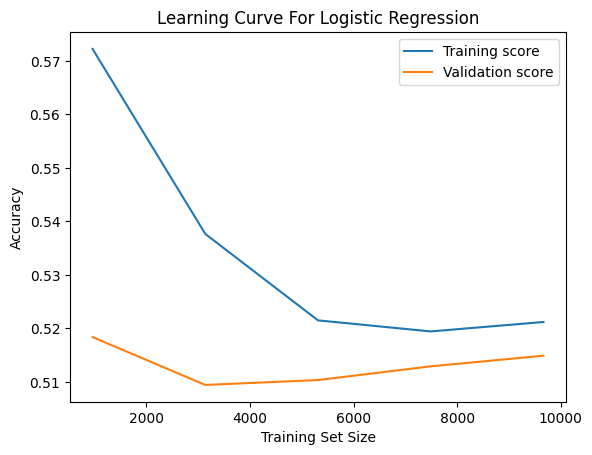

In [73]:
train_sizes, train_scores, test_scores = learning_curve(logreg, X_train, Y_train, cv=5, scoring='accuracy')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Learning Curve For Logistic Regression')
plt.show()


In [74]:
desn = DecisionTreeClassifier()
desn.fit(X_train, Y_train)
print(f'Training Score On Tree: {desn.score(X_train, Y_train)}')
print('\n')
print(f'Testing Score On Tree: {desn.score(X_test, Y_test)}')
print('\n')
print('Classifcation Report for Decision Tree Classification')
print(classification_report(Y_test, desn.predict(X_test)))

Training Score On Tree: 1.0


Testing Score On Tree: 0.8602284011916584


Classifcation Report for Decision Tree Classification
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      2008
           1       0.80      0.97      0.87      2020

    accuracy                           0.86      4028
   macro avg       0.88      0.86      0.86      4028
weighted avg       0.88      0.86      0.86      4028



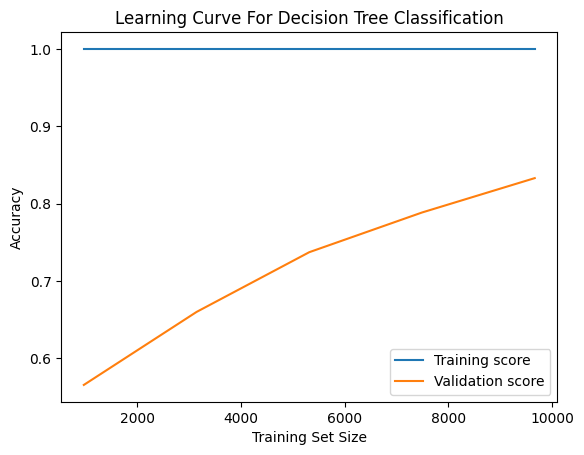

In [75]:
train_sizes, train_scores, test_scores = learning_curve(desn, X_train, Y_train, cv=5, scoring='accuracy')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Learning Curve For Decision Tree Classification')
plt.show()

In [76]:
grad = GradientBoostingClassifier()
grad.fit(X_train, Y_train)
print(f'Training Score On  Forest: {grad.score(X_train, Y_train)}')
print('\n')
print(f'Testing Score On Random Forest: {grad.score(X_test, Y_test)}')
print('\n')
print('Classification Report for Gradient Boosting Model')
print(classification_report(Y_test, grad.predict(X_test)))

Training Score On  Forest: 0.6834133421618938


Testing Score On Random Forest: 0.6268619662363456


Classification Report for Gradient Boosting Model
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      2008
           1       0.62      0.65      0.63      2020

    accuracy                           0.63      4028
   macro avg       0.63      0.63      0.63      4028
weighted avg       0.63      0.63      0.63      4028



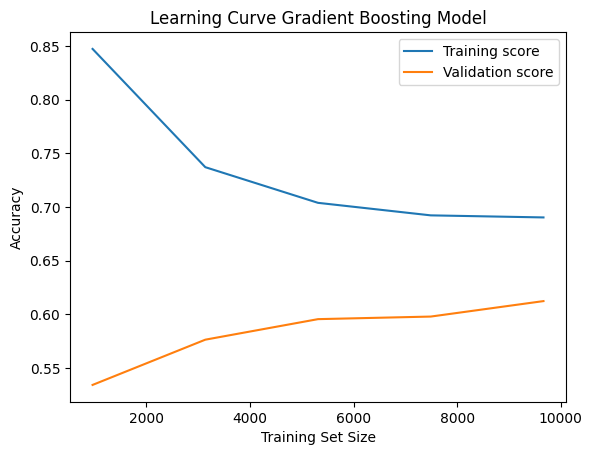

In [78]:
train_sizes, train_scores, test_scores = learning_curve(grad, X_train, Y_train, cv=5, scoring='accuracy')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Learning Curve Gradient Boosting Model')
plt.show()


In [59]:
param_grid = {
  'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}



# Set up cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=grad, param_grid=param_grid, 
                           cv=cv, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(Y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/Users/mikosa/tensor/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2008
           1       1.00      0.96      0.98      2020

    accuracy                           0.98      4028
   macro avg       0.98      0.98      0.98      4028
weighted avg       0.98      0.98      0.98      4028



In [60]:
y_pred_a = best_model.predict(X_train)
print(classification_report(Y_train, y_pred_a))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6047
           1       1.00      1.00      1.00      6035

    accuracy                           1.00     12082
   macro avg       1.00      1.00      1.00     12082
weighted avg       1.00      1.00      1.00     12082



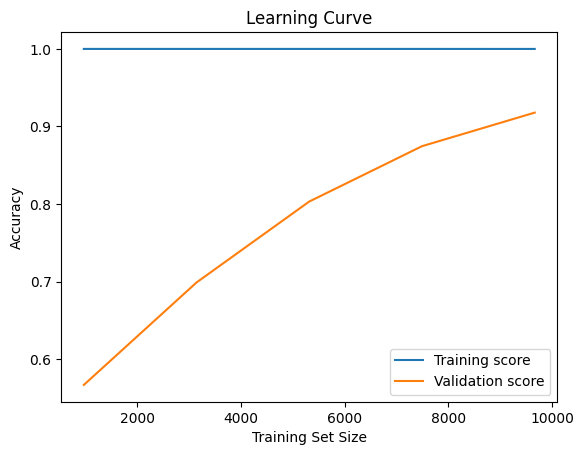

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, Y_train, cv=5, scoring='accuracy')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Learning Curve for GridSearchCV')
plt.show()
